# Predictive Analysis and Model Selection

Applying various ML classifiers from `scikit-learn` to discern when a launch will succeed, selecting model with highest accuracy/fewest T1/T2 errors.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
# -- functions that simplify this notebook

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

def train_test_model(model, model_name, X_train, Y_train, X_test, Y_test, params):
    model_cv = GridSearchCV(model, param_grid=params, cv=10)
    model_cv.fit(X_train, Y_train)
    print(model_name)
    print("Tuned Hyperparameters: ", model_cv.best_params_)
    print("Train Accuracy: ", model_cv.best_score_)
    print("Test Accuracy: ", model_cv.score(X_test,Y_test))
    yhat = model_cv.predict(X_test)
    plot_confusion_matrix(Y_test,yhat)
    print("="*50)
    

### Load the dataframe

In [4]:
data = pd.read_csv("./dataset_part_2.csv")
X = pd.read_csv("./dataset_part_3.csv")

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1.0,False,False,False,NaN,1.0,0.0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1.0,False,False,False,NaN,1.0,0.0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1.0,False,False,False,NaN,1.0,0.0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1.0,False,False,False,NaN,1.0,0.0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1.0,False,False,False,NaN,1.0,0.0,B1004,-80.577366,28.561857,0


In [5]:
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# -- isolate the target values
Y = data['Class'].to_numpy()

In [10]:
# -- standardize feature values

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [26]:
# -- split data into train/test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=52)

### Generate various classifier models with GridSearchCV and compare

- Logistic Regression
- Support Vector Machine
- Decision Tree
- K Nearest Neighbors
- Gradient Boosting

In [13]:
lr = LogisticRegression()
parameters ={
    "C":[0.01,0.1,1],
    'penalty':['l2'], 
    'solver':['lbfgs']
}

models, model_names, params = [lr], ['Logistic Regression'], [parameters]

In [15]:
svm = SVC()
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
models.append(svm)
model_names.append('Support Vector Machine')
params.append(parameters)

In [16]:
tree = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': [None, 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
models.append(tree)
model_names.append('Decision Tree')
params.append(parameters)

In [17]:
KNN = KNeighborsClassifier()
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

models.append(KNN)
model_names.append('K Nearest Neighbors')
params.append(parameters)

In [18]:
XGB = GradientBoostingClassifier()
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 0.9],
}

models.append(XGB)
model_names.append('Gradient Boosting')
params.append(parameters)

Logistic Regression
Tuned Hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy:  0.8053571428571429
Test Accuracy:  0.8888888888888888


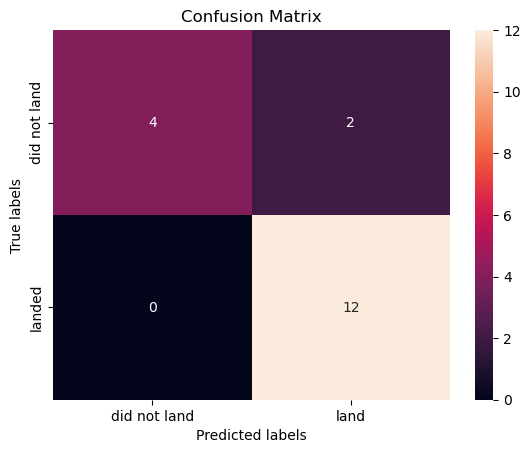

Support Vector Machine
Tuned Hyperparameters:  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Train Accuracy:  0.8053571428571427
Test Accuracy:  0.9444444444444444


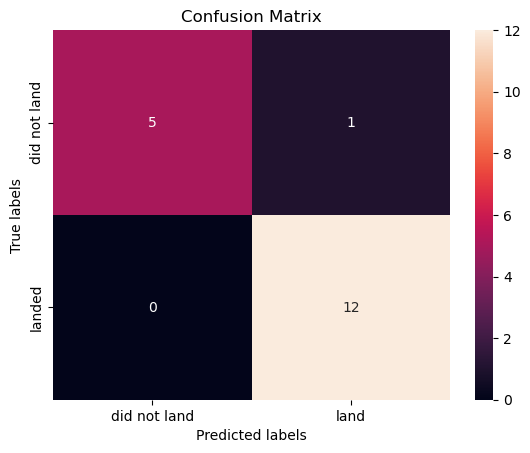

Decision Tree
Tuned Hyperparameters:  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Train Accuracy:  0.8517857142857143
Test Accuracy:  0.7222222222222222


/Users/rweverson/miniconda3/envs/howso/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


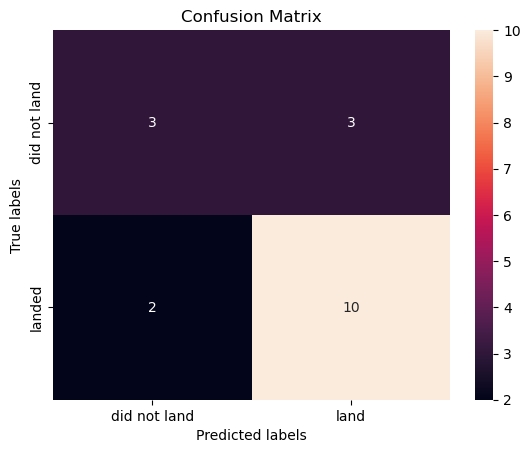

K Nearest Neighbors
Tuned Hyperparameters:  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
Train Accuracy:  0.8071428571428572
Test Accuracy:  0.8333333333333334


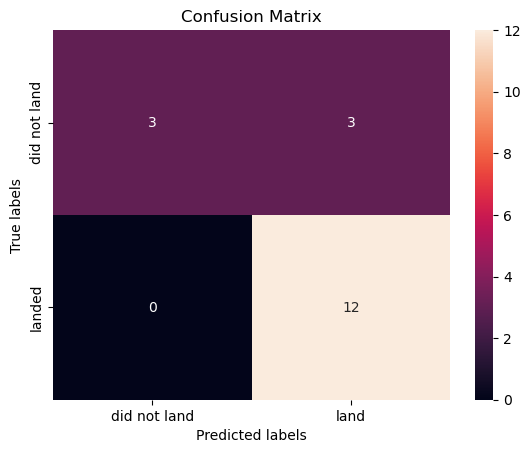

Gradient Boosting
Tuned Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
Train Accuracy:  0.75
Test Accuracy:  0.9444444444444444


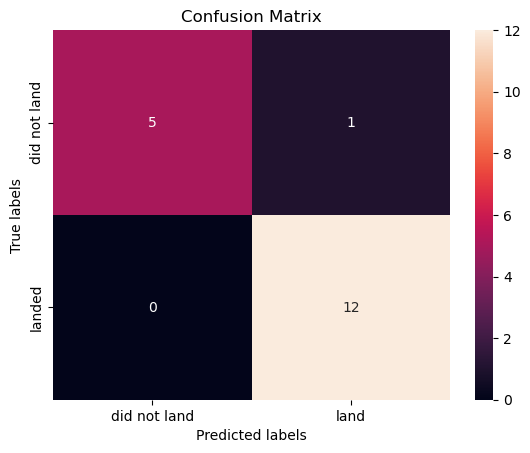

In [27]:
for i in range(len(models)):
    train_test_model(models[i], model_names[i], X_train, y_train, X_test, y_test, params[i])

SVM provides the best train and test accuracy, though with this small sample it does vary with `random_state`.